In [123]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv

In [124]:
data = read_csv('price data.csv', sep=",")

In [125]:
xy = np.array(data)

In [126]:
x_data = xy[:, 1:-1]

In [127]:
y_data = xy[:, -1]

In [128]:
train_x, test_x = x_data[:2800], x_data[2800:]
train_y, test_y = y_data[:2800], y_data[2800:]

In [129]:
x_data

array([[ -4.9, -11. ,   0.9,   0. ],
       [ -3.1,  -5.5,   5.5,   0.8],
       [ -2.9,  -6.9,   1.4,   0. ],
       ...,
       [  2.9,  -2.1,   8. ,   0. ],
       [  2.9,  -1.6,   7.1,   0.6],
       [  2.1,  -2. ,   5.8,   0.4]])

In [130]:
y_data

array([2123., 2123., 2123., ..., 2901., 2901., 2901.])

In [137]:
class mlraWithTF():
    def __init__(self):
        self.epochs = 100
        self.learning_rate = 0.00005
        #Variable setting
        self.w = tf.Variable(tf.random.uniform([4,1], dtype=tf.double))
        self.b = tf.Variable(tf.zeros([1], dtype=tf.double))

    def buildModel(self, x, y):
        with tf.GradientTape() as tape:
            hypothesis = tf.matmul(x, self.w) + self.b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
            loss_w, loss_b = tape.gradient(loss, [self.w, self.b])
        self.w.assign_sub(loss_w * self.learning_rate)
        self.b.assign_sub(loss_b * self.learning_rate)
        return loss
    
    def trainModel(self, x, y):
        data = tf.data.Dataset.from_tensor_slices((x, y))
        data = data.shuffle(buffer_size=50).batch(10)

        loss_mem = []
        for e in range(self.epochs):
            for each, (x,y) in enumerate(data):
                loss = self.buildModel(x, y)
            print('epoch {0}: loss is {1:.4f}'.format(e, float(loss)))
            loss_mem.append(loss)
        return loss_mem
    
    def evalModel(self, x, y):
        y_hat = tf.matmul(x, self.w) + self.b
        mse = tf.reduce_mean(tf.square(y_hat - y))
        rmse = tf.sqrt(mse)
        return rmse

epoch 0: loss is 4147556.1813
epoch 1: loss is 3916348.3958
epoch 2: loss is 4571171.2030
epoch 3: loss is 4015367.7751
epoch 4: loss is 2283070.9337
epoch 5: loss is 3946942.2536
epoch 6: loss is 2486900.0345
epoch 7: loss is 3562266.5484
epoch 8: loss is 2577552.6528
epoch 9: loss is 4407468.5364
epoch 10: loss is 2867049.9334
epoch 11: loss is 4088659.2402
epoch 12: loss is 3230099.6391
epoch 13: loss is 3185646.1108
epoch 14: loss is 4274697.4755
epoch 15: loss is 2639497.6176
epoch 16: loss is 2385493.3467
epoch 17: loss is 2599035.4879
epoch 18: loss is 3846532.6534
epoch 19: loss is 3141883.4065
epoch 20: loss is 2893110.5134
epoch 21: loss is 1606593.9135
epoch 22: loss is 3376221.7310
epoch 23: loss is 3905179.4382
epoch 24: loss is 2966205.3870
epoch 25: loss is 3051830.7363
epoch 26: loss is 3033322.8534
epoch 27: loss is 2875138.1253
epoch 28: loss is 2575967.7374
epoch 29: loss is 3175649.9594
epoch 30: loss is 3673228.1367
epoch 31: loss is 3369480.9686
epoch 32: loss is 

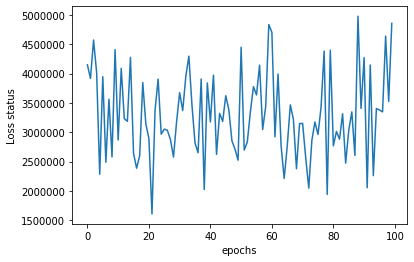

In [138]:
model = mlraWithTF()
loss_mem = model.trainModel(train_x, train_y)

x_epoch = list(range(len(loss_mem)))

plt.plot(x_epoch, loss_mem)
plt.xlabel('epochs')
plt.ylabel('Loss status')
plt.show()